## This cell is used to add the parent directory to the path so that the modules can be imported in the notebook. Run this cell only once

In [1]:
import os
import sys
os.chdir('..')

if os.getcwd() not in sys.path:
    sys.path.append(os.getcwd())

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from scripts.text_classifier import TextClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import accuracy_score, make_scorer, f1_score, confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb
from sklearn.utils import class_weight




In [3]:
dataset = pd.read_csv('data/cleaned_tripadvisor_reviews.csv', index_col=0)


# ***How to Improve Our Model ?***

To enhance the performance of our sentiment analysis model, we explore 5 different algorithms using 2 different vectorization techniques. The goal is to compare their results and identify the most promising model.


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

X = dataset['cleaned_text']
y = dataset['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Liste des modèles à évaluer
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": MultinomialNB()
}


for name, model in models.items():
    print(f"Evaluating model: {name}\n" + "-" * 30)
    
    classifier = TextClassifier(model=model, vectorizer = TfidfVectorizer(max_features=5000, stop_words='english'))
    classifier.train(X_train, y_train)
    classifier.evaluate(X_test, y_test)
    
    print("\n\n")


Evaluating model: Logistic Regression
------------------------------


/Users/delaygues/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.6309
Classification Report:
              precision    recall  f1-score   support

           1       0.75      0.62      0.68       292
           2       0.45      0.38      0.41       333
           3       0.44      0.24      0.31       432
           4       0.55      0.51      0.53      1252
           5       0.70      0.86      0.77      1790

    accuracy                           0.63      4099
   macro avg       0.58      0.52      0.54      4099
weighted avg       0.61      0.63      0.61      4099




Evaluating model: Decision Tree
------------------------------
Accuracy: 0.4518
Classification Report:
              precision    recall  f1-score   support

           1       0.44      0.37      0.40       292
           2       0.22      0.22      0.22       333
           3       0.21      0.22      0.22       432
           4       0.37      0.35      0.36      1252
           5       0.59      0.64      0.61      1790

    accuracy                           

### ***Observation:***

Based on the results with Tfidf vectorizer, it is evident that Logistic Regression outperforms other models in terms of accuracy. The Naive Bayes model, while having a similar accuracy, shows signs of underfitting as it tends to classify everything into the classes with the most data.


### same with CountVectorizer:

In [6]:
X = dataset['cleaned_text']
y = dataset['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Liste des modèles à évaluer
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": MultinomialNB()
}


for name, model in models.items():
    print(f"Evaluating model: {name}\n" + "-" * 30)
    
    classifier = TextClassifier(model=model, vectorizer= CountVectorizer(max_features=5000, stop_words='english'))
    classifier.train(X_train, y_train)
    classifier.evaluate(X_test, y_test)
    
    print("\n\n")

Evaluating model: Logistic Regression
------------------------------


/Users/delaygues/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.5862
Classification Report:
              precision    recall  f1-score   support

           1       0.66      0.57      0.61       292
           2       0.38      0.41      0.40       333
           3       0.35      0.32      0.34       432
           4       0.50      0.44      0.47      1252
           5       0.71      0.79      0.74      1790

    accuracy                           0.59      4099
   macro avg       0.52      0.51      0.51      4099
weighted avg       0.58      0.59      0.58      4099




Evaluating model: Decision Tree
------------------------------
Accuracy: 0.4538
Classification Report:
              precision    recall  f1-score   support

           1       0.47      0.38      0.42       292
           2       0.20      0.19      0.19       333
           3       0.21      0.19      0.20       432
           4       0.39      0.38      0.38      1252
           5       0.59      0.63      0.61      1790

    accuracy                           

### ***observation:***

based on the result of the 2 different loop we have 2 possibilites that are really close to each other: 
- Naive Bayes with the Count vectorizer
- Logistic Regression with TFIDF
we may focus on 1 one them but the others are eliminated of our process

# ***Class Weight***

While exploring the data, we observed a significant imbalance among the classes. Classes 5 and 4 dominate, constituting the majority of the dataset. Our baseline model exhibits a low recall for classes 2 and 3, indicating its struggle to correctly identify instances of these classes. This suggests that the model is underfit and faces difficulty in detecting all five classes. 

To address this issue, we are considering strategies such as adjusting class weights or implementing oversampling, given the limited amount of data available for this specific task

I will whoose to focus on Logistic regression as it's easy to implement class weight on this model and we will see if we are able to improve the baseline results

In [18]:
X = dataset['cleaned_text']
y = dataset['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


classifier = TextClassifier(model=LogisticRegression(max_iter=1000, class_weight='balanced'), vectorizer=TfidfVectorizer(max_features=5000, stop_words='english'))
classifier.train(X_train, y_train)
classifier.evaluate(X_test, y_test)

Accuracy: 0.6094
Classification Report:
              precision    recall  f1-score   support

           1       0.65      0.70      0.67       292
           2       0.38      0.48      0.43       333
           3       0.36      0.44      0.39       432
           4       0.55      0.48      0.52      1252
           5       0.77      0.75      0.76      1790

    accuracy                           0.61      4099
   macro avg       0.54      0.57      0.55      4099
weighted avg       0.62      0.61      0.61      4099



## Summary of Class Weight Experimentation

- **Baseline Model:**
  - Accuracy: 0.63
  - Recall for Class 2: 0.38
  - Recall for Class 3: 0.25

- **Model with Class Weights:**
  - Accuracy: 0.61 (3% decrease)
  - Recall for Class 2: 0.48 (26% improvement)
  - Recall for Class 3: 0.44 (76% improvement)

The use of class weights resulted in a modest 3% decrease in overall accuracy. However, there were significant improvements in recall for Class 2 (26% increase) and Class 3 (76% increase). These findings suggest that incorporating class weights may enhance the model's ability to correctly identify instances of these specific classes, even at the expense of a slight reduction in overall accuracy.


<Axes: >

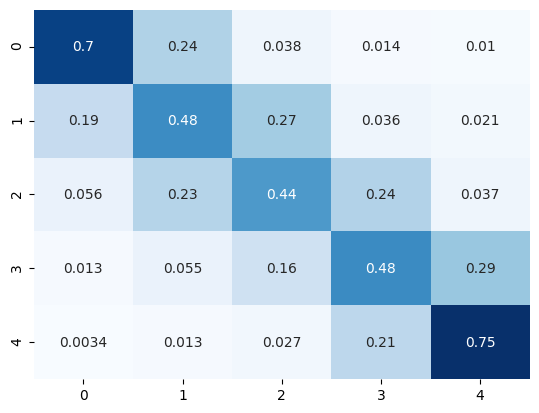

In [23]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
sns.heatmap(cm_normalized, annot=True, color='blue', cmap='Blues', cbar=False, )

## Summary of Class Weight Experimentation

- **Confusion Matrix:**

- Once Again the model tends to make mistake on similar classes, it is not doing big mistakes.
- 27% of rate 2 are predicted as rate 3 **(Carefull! 0 on the Cm is 1 as rate)** as well as 19% of rate 1 are predicted as rate 0 it too much 
- Same probleme for True Rate 2 

Finally I notice that for every class the model is doing between 20% and 30% of mistake with the class before and after. As Labels 1 and 5 are at the extremity of the scale, it can't make prediction above 5 and below 1 so it explains that we have better result. The model has only one side to make mistake.

# ***Trying to use Xgboost model***

In purpose to enhance model performance, I'm exploring the application of XGBoost—a powerful algorithm that often gave me good results in various projects. This decision is motivated by the complexity of the current task and XGBoost's historical effectiveness in similar contexts.


In [5]:
from sklearn.utils import class_weight

X = dataset['cleaned_text']
y = dataset['Rating']
# xgboost need a class that start from 0
y = y - 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sample_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
weight_dict = dict(enumerate(sample_weights))
sample_weights = y_train.map(weight_dict).values

classifier = TextClassifier(model=xgb.XGBClassifier(), vectorizer=CountVectorizer(max_features=5000, stop_words='english'))
classifier.train(X_train, y_train, sample_weight=sample_weights)
classifier.evaluate(X_test, y_test)

Accuracy: 0.6031
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.52      0.62       292
           1       0.41      0.36      0.39       333
           2       0.45      0.16      0.23       432
           3       0.51      0.50      0.50      1252
           4       0.68      0.84      0.75      1790

    accuracy                           0.60      4099
   macro avg       0.56      0.48      0.50      4099
weighted avg       0.59      0.60      0.58      4099



### ***Observation:***

## Comparison with Logistic Regression (Class Weighted)

After applying XGBoost with class weights, here is a comparison with the previous class-weighted model:

- **Accuracy:** 0.6031 (similar)
- **Recall for Class 2:** 0.48 (similar)
- **Recall for Class 3:** 0.16 (64% decrease)

These results Highlights a big decrease in recall for Class 3. This is a significant issue as it is the class with the least amount of data. This suggests that XGBoost is not the best model for this task. 

# ***Further investigation***

this model may just need some tuning, an other vectorizer or to remove class weigh or others... I'm not saying that Logistic Regression is for sure the best model but actually I'm more confident to continue working on it than XGBoost. I tried to remove class weight and also tried Tfidf, result where not better but some others things may improve the model significantly.


# ***Focus on Logistic Regression with class_weight='balanced'***

Given the current performance metrics, Logistic Regression with balanced class weights is the most promising model. Therefore, we wil start an in-depth exploration and refinement of this model. 

we will follow the following steps:
- **Step 1:** Tune the hyperparameters of the model
- **Step 2:** Return to Preprocessing with Bigrams and Trigrams
- **Step 4:** resample the data


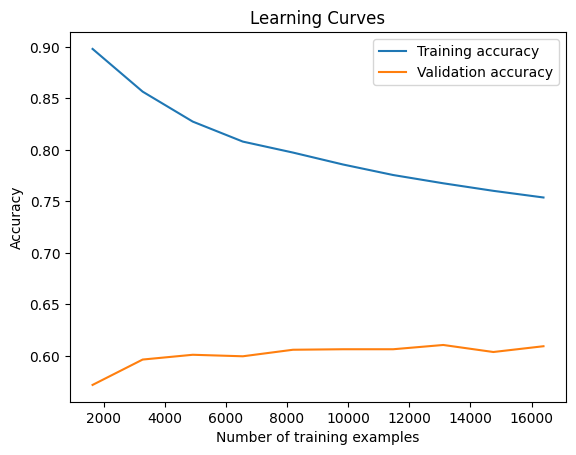

In [17]:
X = dataset['cleaned_text']
y = dataset['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialisations
train_sizes = [int(len(X_train) * x) for x in np.linspace(0.1, 1.0, 10)]
train_scores = []
validation_scores = []

# Boucle sur chaque taille de sous-ensemble
for size in train_sizes:
    # Créer le sous-ensemble de données
    subset_X_train, subset_y_train = X_train[:size], y_train[:size]
    
    # Créer le classifier
    classifier = TextClassifier(
        model=LogisticRegression(max_iter=1000, class_weight='balanced'),
        vectorizer=TfidfVectorizer(max_features=5000, stop_words='english')
        )
    
    classifier.train(subset_X_train, subset_y_train)
    
    # Évaluer sur le sous-ensemble d'apprentissage et l'ensemble de validation
    y_train_pred = classifier.predict(subset_X_train)
    y_val_pred = classifier.predict(X_test)
    
    train_accuracy = accuracy_score(subset_y_train, y_train_pred)
    validation_accuracy = accuracy_score(y_test, y_val_pred)
    
    train_scores.append(train_accuracy)
    validation_scores.append(validation_accuracy)

# Visualiser les résultats
plt.plot(train_sizes, train_scores, label="Training accuracy")
plt.plot(train_sizes, validation_scores, label="Validation accuracy")
plt.xlabel("Number of training examples")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Learning Curves")
plt.show()


### ***Observation:***

The difference between the 2 curves is important. It show that our model is clealy overfitting and the quantity of data reduce a bit this issue. However, the validation curves is improving really slowly and we can suppose that the model may improve by adding a lot of datas specially in the class 1 2 and 3

# ***Hyperparameter tuning***

In [ ]:
X = dataset['cleaned_text']
y = dataset['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paramètres pour GridSearchCV
param_grid = {
    'model__C': [0.01, 0.1, 1, 10, 100],
    'model__penalty': ['l1', 'l2'],
    'model__solver': ['liblinear', 'saga'],
    'vectorizer__max_features': [10000], 
    'vectorizer__stop_words': ['english']
}

# Création d'une pipeline pour combiner le vectorizer et le modèle
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('model', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

# Utilisation de GridSearchCV pour trouver les meilleurs paramètres
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print(f"Meilleurs paramètres : {grid_search.best_params_}")
print(f"Score de validation croisée pour les meilleurs paramètres : {grid_search.best_score_}")

test_score = grid_search.score(X_test, y_test)
print(f"Score sur l'ensemble de test : {test_score}")


### ***Observation:***

Meilleurs paramètres : {'model__C': 1, 'model__penalty': 'l2', 'model__solver': 'liblinear', 'vectorizer__max_features': 10000, 'vectorizer__stop_words': 'english'}

Score de validation croisée pour les meilleurs paramètres : 0.6094443517188625

Score sur l'ensemble de test : 0.6262503049524274

In [22]:
results_df = pd.DataFrame(grid_search.cv_results_)
columns_to_display = ['params', 'mean_test_score', 'std_test_score']
results_df = results_df[columns_to_display]
results_df = results_df.sort_values(by='mean_test_score', ascending=False)

print(results_df)


                                               params  mean_test_score  \
10  {'model__C': 1, 'model__penalty': 'l2', 'model...         0.609444   
6   {'model__C': 0.1, 'model__penalty': 'l2', 'mod...         0.602246   
8   {'model__C': 1, 'model__penalty': 'l1', 'model...         0.594681   
11  {'model__C': 1, 'model__penalty': 'l2', 'model...         0.591752   
7   {'model__C': 0.1, 'model__penalty': 'l2', 'mod...         0.584798   
14  {'model__C': 10, 'model__penalty': 'l2', 'mode...         0.582175   
15  {'model__C': 10, 'model__penalty': 'l2', 'mode...         0.578026   
13  {'model__C': 10, 'model__penalty': 'l1', 'mode...         0.562958   
9   {'model__C': 1, 'model__penalty': 'l1', 'model...         0.561920   
3   {'model__C': 0.01, 'model__penalty': 'l2', 'mo...         0.561311   
19  {'model__C': 100, 'model__penalty': 'l2', 'mod...         0.556369   
12  {'model__C': 10, 'model__penalty': 'l1', 'mode...         0.555820   
18  {'model__C': 100, 'model__penalty'

In [23]:
dataset = pd.read_csv('cleaned_tripadvisor_reviews.csv', index_col=0)

X = dataset['cleaned_text']
y = dataset['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    
classifier = TextClassifier(model=LogisticRegression(max_iter=1000, class_weight='balanced', penalty='l2', C=1, solver='liblinear', ), vectorizer=TfidfVectorizer(max_features=5000, stop_words='english'))
classifier.train(X_train, y_train)
classifier.evaluate(X_test, y_test)

Accuracy: 0.6248
Classification Report:
              precision    recall  f1-score   support

           1       0.65      0.69      0.67       292
           2       0.39      0.47      0.43       333
           3       0.39      0.38      0.38       432
           4       0.57      0.46      0.51      1252
           5       0.74      0.82      0.78      1790

    accuracy                           0.62      4099
   macro avg       0.55      0.56      0.55      4099
weighted avg       0.62      0.62      0.62      4099



## Comparison with Logistic Regression (Class Weighted)

After hyperparameters tuning, here is a comparison with the previous Logistic Regression class-weighted model:

- **Accuracy:** 0.6248 (2% increase)
- **Recall for Class 2:** 0.47 (similar)
- **Recall for Class 3:** 0.38 (13% decrease)

These Results highlights the difficulties to improve the accuracy while keeping a good recall for the class 3. This is a logic issue as it is the class with the least amount of data and the most of dificult to predict with 2 and 4 that are really close

# ***Hyperparameter tuning on different metrics***

I want to know until which point we are able to improve the recall of the class 3 so we will use GridSearchCV to find the best hyperparameters with class 3 recall as scoring

In [ ]:
# Séparation des données en ensembles d'entraînement et de test
X = dataset['cleaned_text']
y = dataset['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paramètres pour GridSearchCV
param_grid = {
    'model__C': [ 0.1, 1, 10],
    'model__penalty': ['l1', 'l2'],
    'model__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'model__multi_class': ['auto', 'ovr', 'multinomial'],
    'model__max_iter': [100],
    'model__fit_intercept': [True, False],
    'vectorizer__max_features': [10000, 20000],
    'vectorizer__stop_words': ['english']
}

# Création d'une pipeline pour combiner le vectorizer et le modèle
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('model', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

# Utilisation de GridSearchCV pour trouver les meilleurs paramètres
def custom_f1_score_class_3(y_true, y_pred):
    return f1_score(y_true, y_pred, labels=[3], average='weighted')
scorer = make_scorer(custom_f1_score_class_3)
grid_search = GridSearchCV(pipeline, param_grid, cv=4, n_jobs=-1, verbose=1, scoring=scorer)
grid_search.fit(X_train, y_train)

# Résultats
print(f"Meilleurs paramètres : {grid_search.best_params_}")
print(f"Score de validation croisée pour les meilleurs paramètres : {grid_search.best_score_}")

# Évaluation sur l'ensemble de test
test_score = grid_search.score(X_test, y_test)
print(f"Score sur l'ensemble de test : {test_score}")

In [43]:
dataset = pd.read_csv('cleaned_tripadvisor_reviews.csv', index_col=0)

X = dataset['cleaned_text']
y = dataset['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    
classifier = TextClassifier(model=LogisticRegression(max_iter=100, class_weight='balanced', penalty='l2', C=0.1, multi_class='ovr',fit_intercept=False, solver='newton-cg'  ), vectorizer=TfidfVectorizer(max_features=20000, stop_words='english'))
classifier.train(X_train, y_train)
classifier.evaluate(X_test, y_test)

Accuracy: 0.6089
Classification Report:
              precision    recall  f1-score   support

           1       0.74      0.59      0.65       292
           2       0.38      0.56      0.45       333
           3       0.37      0.42      0.39       432
           4       0.55      0.48      0.51      1252
           5       0.76      0.76      0.76      1790

    accuracy                           0.61      4099
   macro avg       0.56      0.56      0.55      4099
weighted avg       0.62      0.61      0.61      4099



Logistic Regression with balanced class weights

              precision    recall  f1-score   support

           1       0.65      0.70      0.67       292
           2       0.38      0.48      0.43       333
           3       0.36      0.44      0.39       432
           4       0.55      0.48      0.52      1252
           5       0.77      0.75      0.76      1790
          accuracy                     0.61      4099


### ***Observation:***

- We have really different results with the 2 different metrics while f1 score is approximately the same for each class. 
- We improved the recall of class 2 by 0.08
- Lost 0.11 in recall for class 1 while increasing accuracy by 0.9 in the same class. 

### ***Conclusion:***

I will choose to focus on the simple Logistic Regression with class_weight='balanced' as hyperparameter tuning gave nothing really interesting. 
This way I prefer to keep it simple

# ***return to preprocessing***

this part could have been added to the preprocessing pipeline but I was interested to notice the importance that it could have on my model and if it could give some interesting insight to the model in order to increase the result. That's why I'm testing there.

# ***bigram and trigram***

In [5]:
from gensim.models.phrases import Phrases

words = [review.split() for review in dataset['cleaned_text']]

# Détecter et ajouter les bigrammes et trigrammes
bigram = Phrases(words, min_count=10)
trigram = Phrases(bigram[words])

for idx in range(len(words)):
    doc = words[idx]
    
    # Ajouter les bigrammes
    bigrams = [token for token in bigram[doc] if '_' in token]
    words[idx].extend(bigrams)
    
    # Ajouter les trigrammes
    trigrams = [token for token in trigram[bigram[doc]] if '_' in token]
    words[idx].extend(trigrams)

# Remplacez la colonne cleaned_text par la version mise à jour
dataset['cleaned_text'] = words

# convertir les listes de mots de retour en chaînes :
dataset['cleaned_text'] = [' '.join(doc) for doc in words]

print(dataset.head())

                                              Review  Rating  \
0  nice hotel expensive parking got good deal sta...       4   
1  ok nothing special charge diamond member hilto...       2   
2  nice rooms not 4* experience hotel monaco seat...       3   
3  unique, great stay, wonderful time hotel monac...       5   
4  great stay great stay, went seahawk game aweso...       5   

                                        cleaned_text  
0  nice hotel expensive parking get good deal sta...  
1  ok nothing special charge diamond member hilto...  
2  nice room 4 experience hotel monaco seattle go...  
3  unique great stay wonderful time hotel monaco ...  
4  great stay great stay go seahawk game awesome ...  


# ***remove most common and rare words***

In [6]:
from gensim.corpora import Dictionary

# Créer un dictionnaire à partir des documents
dictionary = Dictionary(words)
print('Number of unique words in initial documents:', len(dictionary))

# Filtrer les mots qui apparaissent dans moins de 10 documents ou dans plus de 30% des documents
dictionary.filter_extremes(no_below=10, no_above=0.4)
print('Number of unique words after removing rare and common words:', len(dictionary))

Number of unique words in initial documents: 84501
Number of unique words after removing rare and common words: 13367


In [7]:
X = dataset['cleaned_text']
y = dataset['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    
classifier = TextClassifier(model=LogisticRegression(max_iter=100, class_weight='balanced'  ), vectorizer=TfidfVectorizer(max_features=20000, stop_words='english'))
classifier.train(X_train, y_train)
classifier.evaluate(X_test, y_test)

/Users/delaygues/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.5962
Classification Report:
              precision    recall  f1-score   support

           1       0.66      0.68      0.67       292
           2       0.38      0.47      0.42       333
           3       0.33      0.39      0.36       432
           4       0.53      0.46      0.49      1252
           5       0.75      0.75      0.75      1790

    accuracy                           0.60      4099
   macro avg       0.53      0.55      0.54      4099
weighted avg       0.60      0.60      0.60      4099



### ***Observation:***

Once again these result did not improved the model. F1 score by classes are really similar or even lower than the previous model.

# ***Remapping the Predictions***

To enhance interpretability, the predictions will be remapped as follows:
- Class 1 → Negative
- Class 2 → Negative
- Class 3 → Negative
- Class 4 → Good
- Class 5 → Excellent

- It makes senses as from a Rate of 3 people will start to be mefiants while looking for an hotel on their phone. 
- This remapping allows to approximately equalize the number of instances in each category, which will facilitate the interpretation of the model's outputs. However as we seen in EDA it will probably lead to a lot of misclassification between Good and Negative as 4 was often miscclasified with 3

This remapping provides simplified prediction categories, making the predictions easier for the model while keeping real sense for the user.



In [24]:
dataset = pd.read_csv('data/cleaned_tripadvisor_reviews.csv', index_col=0)
mapping = {1: 'negative', 2: 'negative', 3: 'negative', 4: 'good', 5: 'excellent'}
dataset['sentiment'] = dataset['Rating'].map(mapping)

In [25]:
X = dataset['cleaned_text']
y = dataset['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    
classifier = TextClassifier(model=LogisticRegression(max_iter=100, class_weight='balanced', penalty='l2', C=1, solver='liblinear', ), vectorizer=TfidfVectorizer(max_features=5000, stop_words='english'))
classifier.train(X_train, y_train)
classifier.evaluate(X_test, y_test)


Accuracy: 0.7146
Classification Report:
              precision    recall  f1-score   support

   excellent       0.75      0.82      0.78      1790
        good       0.58      0.47      0.52      1252
    negative       0.77      0.83      0.80      1057

    accuracy                           0.71      4099
   macro avg       0.70      0.71      0.70      4099
weighted avg       0.70      0.71      0.71      4099



<Axes: >

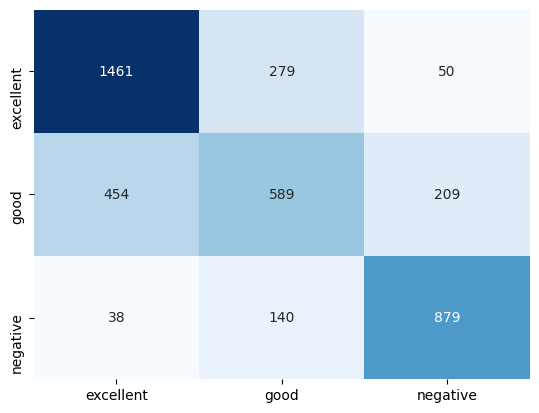

In [16]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
labels = ['excellent', 'good', 'negative']
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
sns.heatmap(cm, annot=True, fmt='d', color='blue', cmap='Blues', cbar=False, xticklabels=labels, yticklabels=labels)


### ***Observation:***

- As expected the class "good" is difficult to predict but for the others classes we have good result.
- We notice the fact that the model is almost never doing big mistakes, it only has difficulties to differenciate Good / excellent and Good / Negative.
- The number of True Good classified as excellent is huge. it could be a big are of improvement for the model.
- As we discussed before, the class Good is the only class that as rate below and above. It is the only class that can make mistake on both sides. It is like a bias that explain why we have worst result on this class


In [32]:
# Get the feature names from the vectorizer
feature_names = np.array(classifier.vectorizer.get_feature_names_out())

# Get the coefficients from the trained model
coefficients = classifier.model.coef_

# Define specific terms related to hotel elements
hotel_elements = [
    'lot', 'want', 'beautiful', 'really', 'buffet', 'drink', 'water', 'bar', 'like', 'people',
    'punta_cana', 'pool', 'food', 'resort', 'beach', 'block', 'wonderful', 'city', 'excellent',
    'price', 'highly_recommend', 'recommend', 'comfortable', 'walk_distance', 'small', 'street',
    'area', 'staff_friendly', 'helpful', 'friendly', 'pay', 'leave', 'food', 'book', 'pool', 'people',
    'bad', 'come', 'ask', 'check', 'desk', 'tell', 'like', 'say', 'new_york', 'station', 'price', 'city',
    'minute', 'area', 'book', 'really', 'excellent', 'floor', 'view', 'small', 'bathroom', 'bed'
]

# Display the top N features for each class related to hotel elements
top_n = 10
for i, sentiment_class in enumerate(classifier.model.classes_):
    print(f"Top {top_n} hotel-related words for Class {sentiment_class}:")
    class_coefficients = coefficients[i]
    
    # Filter coefficients related to hotel elements
    hotel_related_coefficients = [coef for coef, feature in zip(class_coefficients, feature_names) if feature in hotel_elements]
    
    # Get the corresponding feature names
    hotel_related_features = [feature for feature in feature_names if feature in hotel_elements]
    
    # Sort based on coefficients
    sorted_features = sorted(zip(hotel_related_features, hotel_related_coefficients), key=lambda x: x[1], reverse=True)
    
    # Display top features
    top_features = [feature for feature, _ in sorted_features[:top_n]]
    print(top_features)
    print("\n")




Top 10 hotel-related words for Class excellent:
['excellent', 'wonderful', 'beautiful', 'friendly', 'want', 'recommend', 'helpful', 'book', 'really', 'pool']


Top 10 hotel-related words for Class good:
['comfortable', 'small', 'helpful', 'food', 'beach', 'floor', 'price', 'street', 'block', 'view']


Top 10 hotel-related words for Class negative:
['bad', 'tell', 'pay', 'small', 'desk', 'say', 'bathroom', 'ask', 'bed', 'area']




# ***Observation***

By using the words from the Topic modelling notebook, we can learn about the words that are the most present in each class it means that they have a big impact on the prediction of the model. 

### ***Going further?:***

My last Idea to improve the model and get real insgiht on what are the best elements for a model is to print these most important words but based on a list of bigram and trigram created as follows: adj + hotel related words. it means that everytime we have a words as excellent, bad, wonderful... we create a bigram with the best words so that the top words will be for exemple wonderful view, expensive price what give real insight.